# Import necessary libraries

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
import warnings

In [237]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data
df = pd.read_csv('data2_train.csv')

# Basic data exploration

In [238]:
# Display the first few rows of the dataframe
print(df.head())

   Feature_1   Feature_2  Target
0   8.160646   88.799326       0
1  31.149536  102.335826       0
2  13.103383   92.902908       0
3  15.950445   77.412565       0
4  35.856965   94.441550       0


In [239]:
# Display the shape of the dataframe
print(df.shape)

(800, 3)


In [240]:
# Display summary information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  800 non-null    float64
 1   Feature_2  800 non-null    float64
 2   Target     800 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.9 KB
None


In [241]:
# Display descriptive statistics of the dataframe
print(df.describe())

        Feature_1   Feature_2      Target
count  800.000000  800.000000  800.000000
mean    33.685050   63.058641    0.476250
std     11.054919   26.940283    0.499748
min      0.102781    5.517599    0.000000
25%     26.125359   37.469336    0.000000
50%     33.844965   68.657961    0.000000
75%     41.613913   87.467784    1.000000
max     67.524338  129.865574    1.000000


In [242]:
# Check for duplicate rows
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [243]:
# Display the distribution of the target variable
print(df['Target'].value_counts())

Target
0    419
1    381
Name: count, dtype: int64


# Data visualization

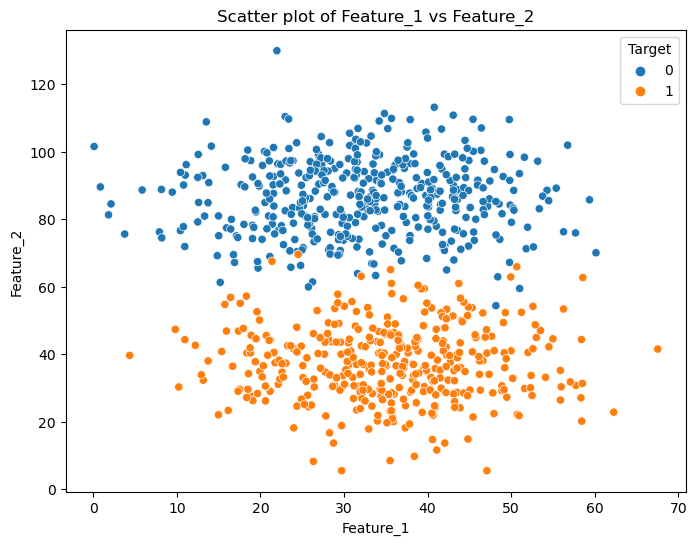

In [244]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Target'])
plt.title('Scatter plot of Feature_1 vs Feature_2')
plt.show()

In [245]:
# Function to remove outliers
def no_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_limit = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_limit = Q3 + 1.5 * IQR  # Upper bound for outliers
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]  # Remove outliers
    return df

In [246]:
# Remove outliers from the dataframe
df = no_outliers(df, ['Feature_1', 'Feature_2'])

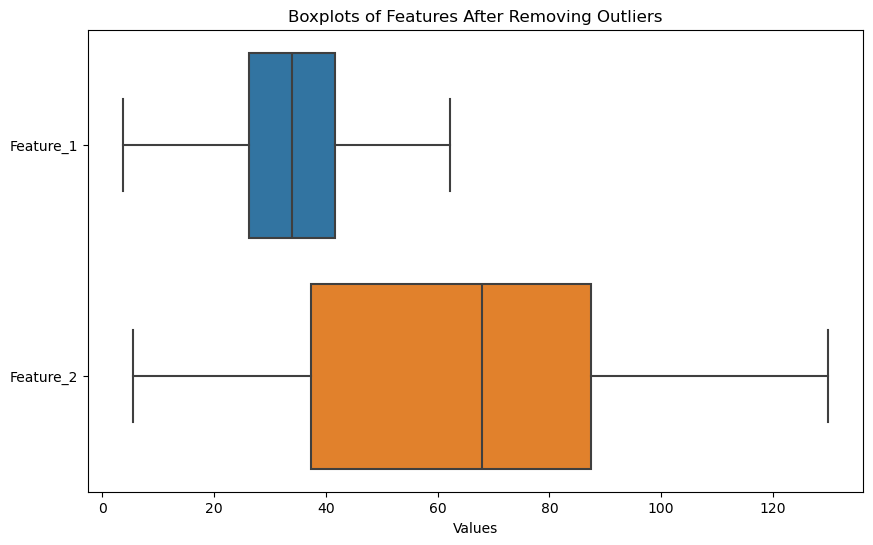

In [247]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h')
plt.title('Boxplots of Features After Removing Outliers')
plt.xlabel('Values')
plt.show()

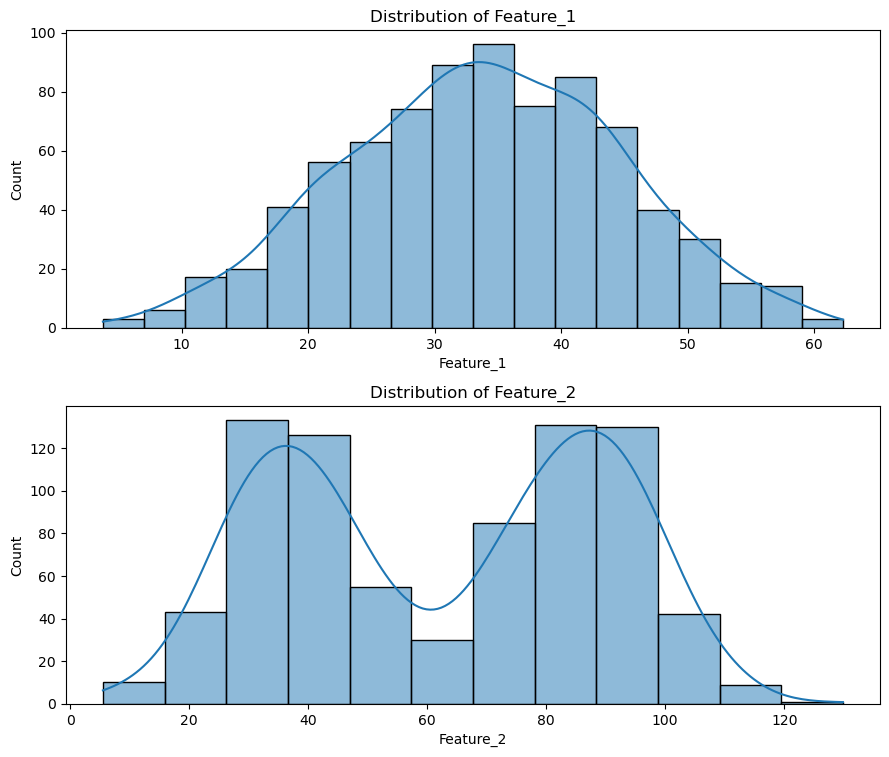

In [248]:
# Distribution plots
plt.figure(figsize=(9, 11))

plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.tight_layout()
plt.show()

In [249]:
# Feature scaling after data split to avoid data leakage
scaler = StandardScaler()
df[['Feature_1', 'Feature_2']] = scaler.fit_transform(df[['Feature_1', 'Feature_2']])

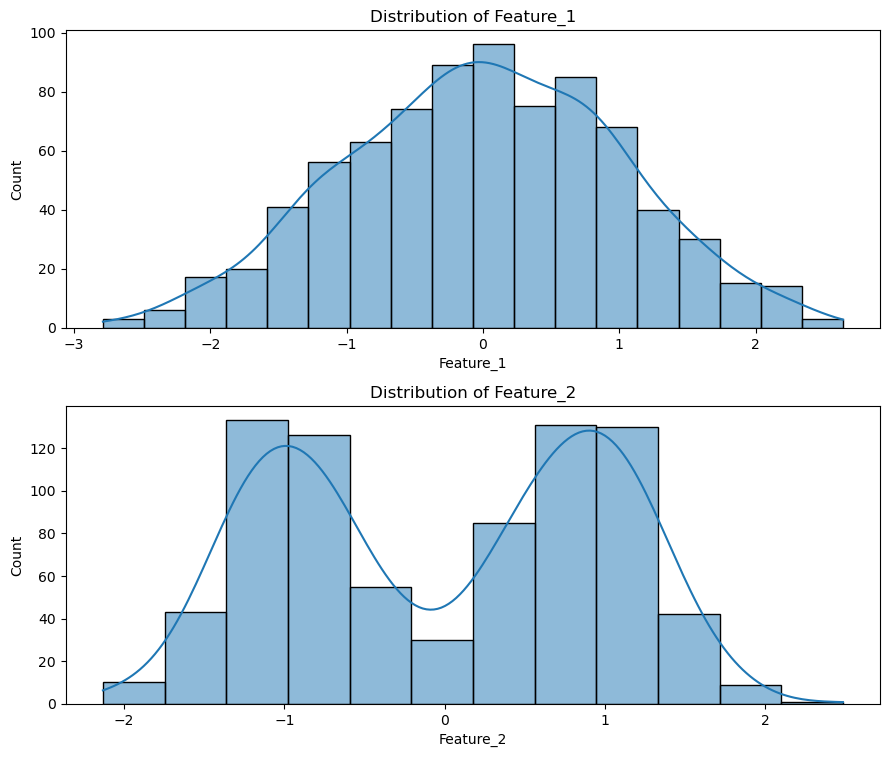

In [250]:
# Distribution plots
plt.figure(figsize=(9, 11))

plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.tight_layout()
plt.show()

In [251]:
# Check skewness
print(f"Skewness of Feature_1: {df['Feature_1'].skew()}")
print(f"Skewness of Feature_2: {df['Feature_2'].skew()}")

Skewness of Feature_1: -0.05555586365542708
Skewness of Feature_2: -0.06251770393589874


In [252]:
# Data split
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Logistic Regression Model

# Mathematical Explanation of Logistic Regression

## Fundamental Principles

Logistic regression is a statistical model used for binary classification. It predicts the probability that a given input belongs to a particular class. The fundamental equation of logistic regression is the logistic function (also known as the sigmoid function):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $ z = \mathbf{w}^T \mathbf{x} + b $. Here, $ \mathbf{w} $ is the weight vector, $ \mathbf{x} $ is the input feature vector, and $ b $ is the bias term. The output $ \sigma(z) $ ranges from 0 to 1 and represents the probability of the input belonging to the positive class.

## Assumptions

1. **Linearity in the Log-Odds**: Logistic regression assumes a linear relationship between the input features and the log-odds of the outcome.
2. **Independent Observations**: The observations in the dataset should be independent of each other.
3. **Minimal Multicollinearity**: The input features should not be highly correlated with each other.

## Equations

1. **Logistic Function**:
    $$
     \sigma(z) = \frac{1}{1 + e^{-z}} 
    $$
<br>
<br>
2. **Cost Function (Binary Cross-Entropy Loss)**:
    $$
    J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
    $$ <br> <br> 
    where $ \hat{y}^{(i)} = \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b)  $, $ y^{(i)} $ is the true label, and $ m $ is the number of samples.<br> <br> 
    
    calculating the derivative of the cost function wrt $ \mathbf{b} $ gives : $$ \frac{\partial J(\mathbf{w}, b)}{\partial\mathbf{b}} =\frac{1}{m} \sum_{i=0}^{m-1} \sigma(\mathbf{w}^T \mathbf{x}^{(i)}+b) - y^{(i)}$$
    
    calculating the derivative of the cost function wrt $ \mathbf{w} $ gives : $$ \frac{\partial J(\mathbf{w}, b)}{\partial\mathbf{w_j}} = \frac{1}{m} \sum_{i=0}^{m-1} (\sigma(\mathbf{w}^T \mathbf{x}^{(i)}+b) - y^{(i)}) x_j^{(i)}$$<br> <br> 
      
3. **Gradient Descent Updates**:
    $$
    \mathbf{w} := \mathbf{w} - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial \mathbf{w}}
    $$<br> <br> 
    $$
    b := b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}
    $$
    where $ \alpha $ is the learning rate.

## Learning from Data

1. **Initialization**: Initialize the weights $ \mathbf{w} $ and bias $ b $ to zero or small random values.
2. **Forward Propagation**: Compute the predicted probabilities $ \hat{y} = \sigma(\mathbf{w}^T \mathbf{x} + b) $.
3. **Compute Loss**: Calculate the binary cross-entropy loss.
4. **Compute Gradients**: Compute the gradients of the loss with respect to the weights and bias.
5. **Parameter Update**: Update the weights and bias using gradient descent.
6. **Iteration**: Repeat steps 2-5 for a specified number of iterations or until convergence.

## Making Predictions

To make predictions, we compute the probability $ \hat{y} = \sigma(\mathbf{w}^T \mathbf{x} + b) $. If $ \hat{y} > 0.5 $, we predict the positive class (1); otherwise, we predict the negative class (0).


In [253]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(z)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def grid_search (self,X_train , Y_train , X_val , Y_val , param_grid):
        best_accuracy = 0
        best_params = None 

        for params in ParameterGrid(param_grid):
            model = CustomLogisticRegression(learning_rate=params['learning_rate'],n_iterations=params['n_iterations'])
            model.fit(X_train , Y_train)
            y_val_pred = model.predict(X_val)
            accuracy = accuracy_score(Y_val, y_val_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = params
        return best_params , best_accuracy 

In [254]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_iterations': [100, 1000, 10000]
}
clr = CustomLogisticRegression()
best_params , best_accuracy = clr.grid_search(X_train , Y_train , X_val , Y_val , param_grid)

In [255]:
print(f"Best hyperparameters: {best_params}")
print(f"Best validation set accuracy: {best_accuracy}")

Best hyperparameters: {'learning_rate': 0.001, 'n_iterations': 10000}
Best validation set accuracy: 0.99581589958159


In [256]:
# Train final model with best hyperparameters 
best_lr = best_params['learning_rate']
best_n_iter = best_params['n_iterations']
X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((Y_train, Y_val), axis=0)

model = CustomLogisticRegression(learning_rate=best_lr, n_iterations=best_n_iter)
model.fit(X_final_train, y_final_train)

In [257]:
# Accuracy on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_accuracy = accuracy_score(Y_train, y_train_pred)
val_accuracy = accuracy_score(Y_val, y_val_pred)

In [258]:
print(f"Training set accuracy: {train_accuracy}")
print(f"Validation set accuracy: {val_accuracy}")

Training set accuracy: 0.9856115107913669
Validation set accuracy: 0.99581589958159


In [259]:
# Load test data
df_test = pd.read_csv('data2_test.csv')
print(df_test.head())

   Feature_1  Feature_2  Target
0  48.489576  81.609641       0
1  26.069706  89.783100       0
2  31.967447  88.005024       0
3  44.957613  91.219129       0
4  27.681870  87.381969       0


In [260]:
# Scale test data 
df_test[['Feature_1', 'Feature_2']] = scaler.transform(df_test[['Feature_1', 'Feature_2']])
X_test = df_test[['Feature_1', 'Feature_2']].values
y_test = df_test['Target'].values

In [261]:
# Predict test data
y_test_pred = model.predict(X_test)

In [262]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.99


In [263]:
# Extract final weights and bias
final_weights = model.weights
final_bias = model.bias
print(f'Final weights: {final_weights}')
print(f'Final bias: {final_bias}')

Final weights: [ 0.15631927 -2.04379087]
Final bias: -0.0987077055053082


In [264]:
# Plot the decision boundary using the final logistic regression model
def plot_decision_boundary(X, y, weights, bias, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z = np.dot(grid, weights) + bias
    probs = 1 / (1 + np.exp(-z))
    Z = (probs > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

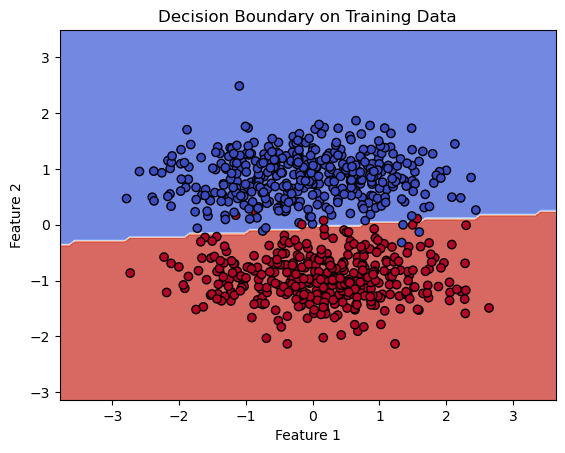

In [265]:
# Plot decision boundary on training data
plot_decision_boundary(X_final_train, y_final_train, final_weights, final_bias, title='Decision Boundary on Training Data')

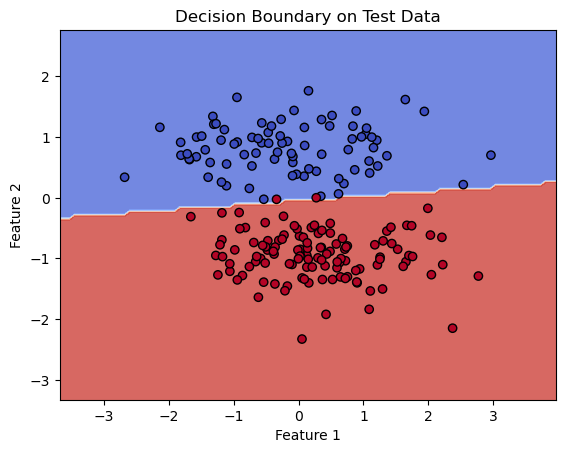

In [266]:
# Plot decision boundary on test data
plot_decision_boundary(X_test, y_test, final_weights, final_bias, title='Decision Boundary on Test Data')

# Training and testing the model using Sklearn library

In [267]:
# Create an instance of the LogisticRegression model
model = LogisticRegression(max_iter = 10000)
# Train the model on the final training set
model.fit(X_final_train, y_final_train)

LogisticRegression(max_iter=10000)

In [268]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

In [269]:
# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test , y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.99
